# CIA Country Analysis and Clustering


Source: All these data sets are made up of data from the US government. 
https://www.cia.gov/library/publications/the-world-factbook/docs/faqs.html

## Goal: 

I have explored the similarities between countries and regions worldwide by experimenting with various cluster amounts. 

The resulting clusters offer insights into potential patterns or groupings, shedding light on similarities and relationships between different nations and regions. 

The process involves analyzing and understanding the relationships uncovered through clustering, providing a nuanced understanding of the global landscape. 

---

### Imports and Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../DATA/CIA_Country_Facts.csv')

### Exploratory Data Analysis

In [3]:
df.head()

Country                               Region  Population  \
0     Afghanistan        ASIA (EX. NEAR EAST)             31056997   
1         Albania  EASTERN EUROPE                          3581655   
2         Algeria  NORTHERN AFRICA                        32930091   
3  American Samoa  OCEANIA                                   57794   
4         Andorra  WESTERN EUROPE                            71201   

   Area (sq. mi.)  Pop. Density (per sq. mi.)  Coastline (coast/area ratio)  \
0          647500                        48.0                          0.00   
1           28748                       124.6                          1.26   
2         2381740                        13.8                          0.04   
3             199                       290.4                         58.29   
4             468                       152.1                          0.00   

   Net migration  Infant mortality (per 1000 births)  GDP ($ per capita)  \
0          23.06                              163.07               700.0   
1          -4.93                               21.52              4500.0   
2          -0.39                               31.00              6000.0   
3         -20.71                                9.27              8000.0   
4           6.60                                4.05             19000.0   

   Literacy (%)  Phones (per 1000)  Arable (%)  Crops (%)  Other (%)  Climate  \
0          36.0                3.2       12.13       0.22      87.65      1.0   
1          86.5               71.2       21.09       4.42      74.49      3.0   
2          70.0               78.1        3.22       0.25      96.53      1.0   
3          97.0              259.5       10.00      15.00      75.00      2.0   
4         100.0              497.2        2.22       0.00      97.78      3.0   

   Birthrate  Deathrate  Agriculture  Industry  Service  
0      46.60      20.34        0.380     0.240    0.380  
1      15.11       5.22        0.232     0.188    0.579  
2      17.14       4.61        0.101     0.600    0.298  
3      22.46       3.27          NaN       NaN      NaN  
4       8.71       6.25          NaN       NaN      NaN

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Country                             227 non-null    object 
 1   Region                              227 non-null    object 
 2   Population                          227 non-null    int64  
 3   Area (sq. mi.)                      227 non-null    int64  
 4   Pop. Density (per sq. mi.)          227 non-null    float64
 5   Coastline (coast/area ratio)        227 non-null    float64
 6   Net migration                       224 non-null    float64
 7   Infant mortality (per 1000 births)  224 non-null    float64
 8   GDP ($ per capita)                  226 non-null    float64
 9   Literacy (%)                        209 non-null    float64
 10  Phones (per 1000)                   223 non-null    float64
 11  Arable (%)                          225 non-n

In [5]:
df.describe().transpose()

count          mean           std  \
Population                          227.0  2.874028e+07  1.178913e+08   
Area (sq. mi.)                      227.0  5.982270e+05  1.790282e+06   
Pop. Density (per sq. mi.)          227.0  3.790471e+02  1.660186e+03   
Coastline (coast/area ratio)        227.0  2.116533e+01  7.228686e+01   
Net migration                       224.0  3.812500e-02  4.889269e+00   
Infant mortality (per 1000 births)  224.0  3.550696e+01  3.538990e+01   
GDP ($ per capita)                  226.0  9.689823e+03  1.004914e+04   
Literacy (%)                        209.0  8.283828e+01  1.972217e+01   
Phones (per 1000)                   223.0  2.360614e+02  2.279918e+02   
Arable (%)                          225.0  1.379711e+01  1.304040e+01   
Crops (%)                           225.0  4.564222e+00  8.361470e+00   
Other (%)                           225.0  8.163831e+01  1.614083e+01   
Climate                             205.0  2.139024e+00  6.993968e-01   
Birthrate                           224.0  2.211473e+01  1.117672e+01   
Deathrate                           223.0  9.241345e+00  4.990026e+00   
Agriculture                         212.0  1.508443e-01  1.467980e-01   
Industry                            211.0  2.827109e-01  1.382722e-01   
Service                             212.0  5.652830e-01  1.658410e-01   

                                         min           25%          50%  \
Population                          7026.000  437624.00000  4786994.000   
Area (sq. mi.)                         2.000    4647.50000    86600.000   
Pop. Density (per sq. mi.)             0.000      29.15000       78.800   
Coastline (coast/area ratio)           0.000       0.10000        0.730   
Net migration                        -20.990      -0.92750        0.000   
Infant mortality (per 1000 births)     2.290       8.15000       21.000   
GDP ($ per capita)                   500.000    1900.00000     5550.000   
Literacy (%)                          17.600      70.60000       92.500   
Phones (per 1000)                      0.200      37.80000      176.200   
Arable (%)                             0.000       3.22000       10.420   
Crops (%)                              0.000       0.19000        1.030   
Other (%)                             33.330      71.65000       85.700   
Climate                                1.000       2.00000        2.000   
Birthrate                              7.290      12.67250       18.790   
Deathrate                              2.290       5.91000        7.840   
Agriculture                            0.000       0.03775        0.099   
Industry                               0.020       0.19300        0.272   
Service                                0.062       0.42925        0.571   

                                             75%           max  
Population                          1.749777e+07  1.313974e+09  
Area (sq. mi.)                      4.418110e+05  1.707520e+07  
Pop. Density (per sq. mi.)          1.901500e+02  1.627150e+04  
Coastline (coast/area ratio)        1.034500e+01  8.706600e+02  
Net migration                       9.975000e-01  2.306000e+01  
Infant mortality (per 1000 births)  5.570500e+01  1.911900e+02  
GDP ($ per capita)                  1.570000e+04  5.510000e+04  
Literacy (%)                        9.800000e+01  1.000000e+02  
Phones (per 1000)                   3.896500e+02  1.035600e+03  
Arable (%)                          2.000000e+01  6.211000e+01  
Crops (%)                           4.440000e+00  5.068000e+01  
Other (%)                           9.544000e+01  1.000000e+02  
Climate                             3.000000e+00  4.000000e+00  
Birthrate                           2.982000e+01  5.073000e+01  
Deathrate                           1.060500e+01  2.974000e+01  
Agriculture                         2.210000e-01  7.690000e-01  
Industry                            3.410000e-01  9.060000e-01  
Service                             6.785000e-01  9.

**histogram of the Population column**

<AxesSubplot:xlabel='Population', ylabel='Count'>

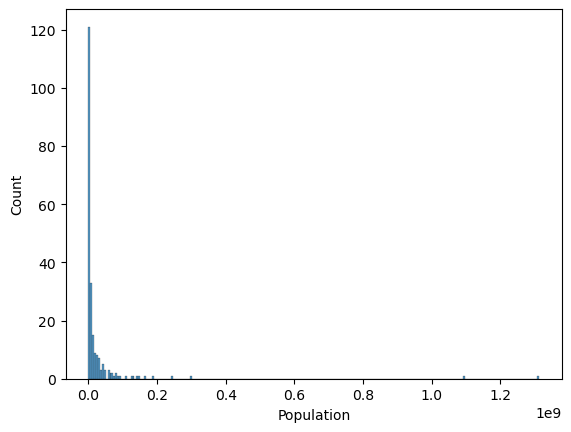

In [6]:
sns.histplot(data=df, x='Population')

**The histogram is skewed due to a few large countries, so I reset the X axis to only show countries with less than 0.5 billion people**

<AxesSubplot:xlabel='Population', ylabel='Count'>

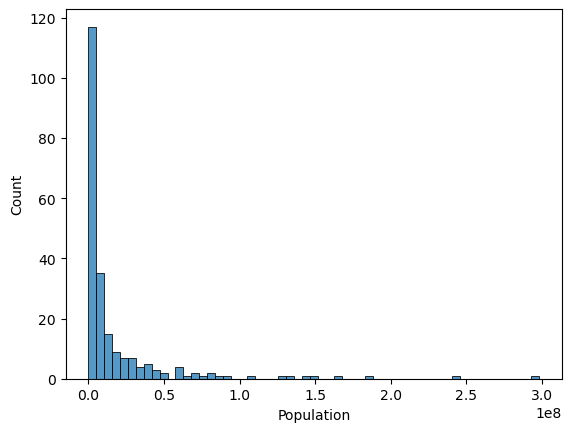

In [7]:
sns.histplot(data=df[df['Population']<500000000],x='Population')

**bar chart showing the mean GDP per Capita per region**

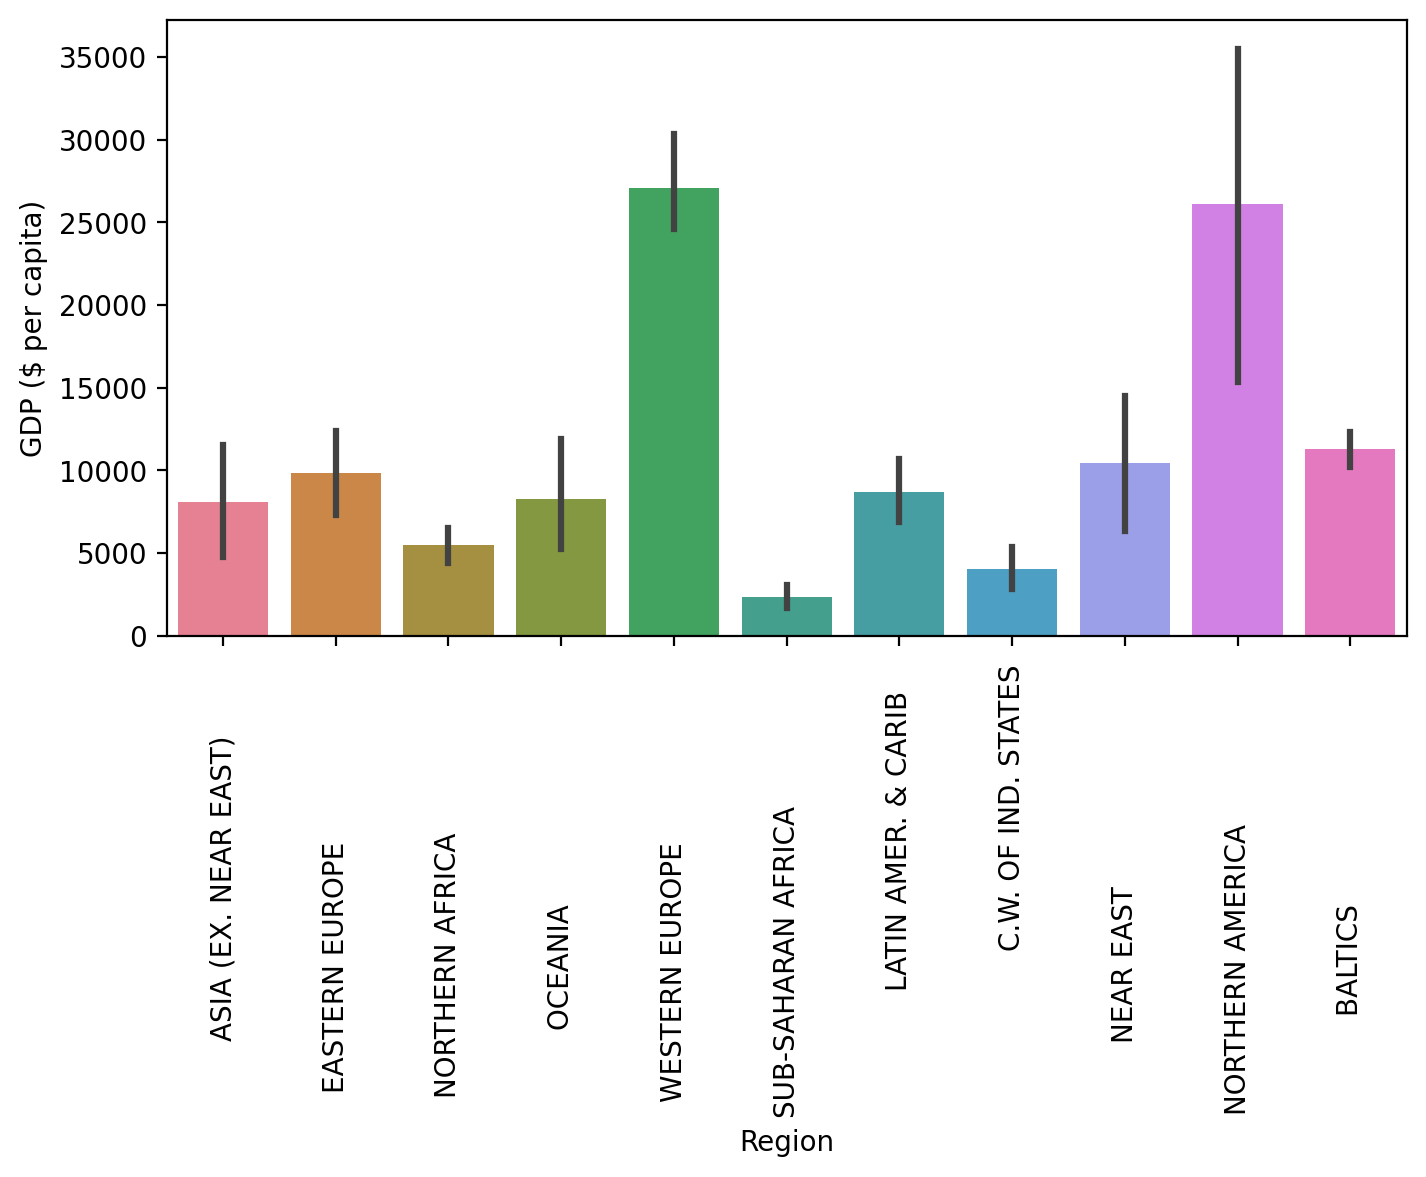

In [8]:
plt.figure(figsize=(8,4),dpi=200)
sns.barplot(data=df,y='GDP ($ per capita)',x='Region',estimator=np.mean, hue='Region')
plt.xticks(rotation=90);

**scatterplot showing the relationship between Phones per 1000 people and the GDP per Capita. Color these points by Region.**

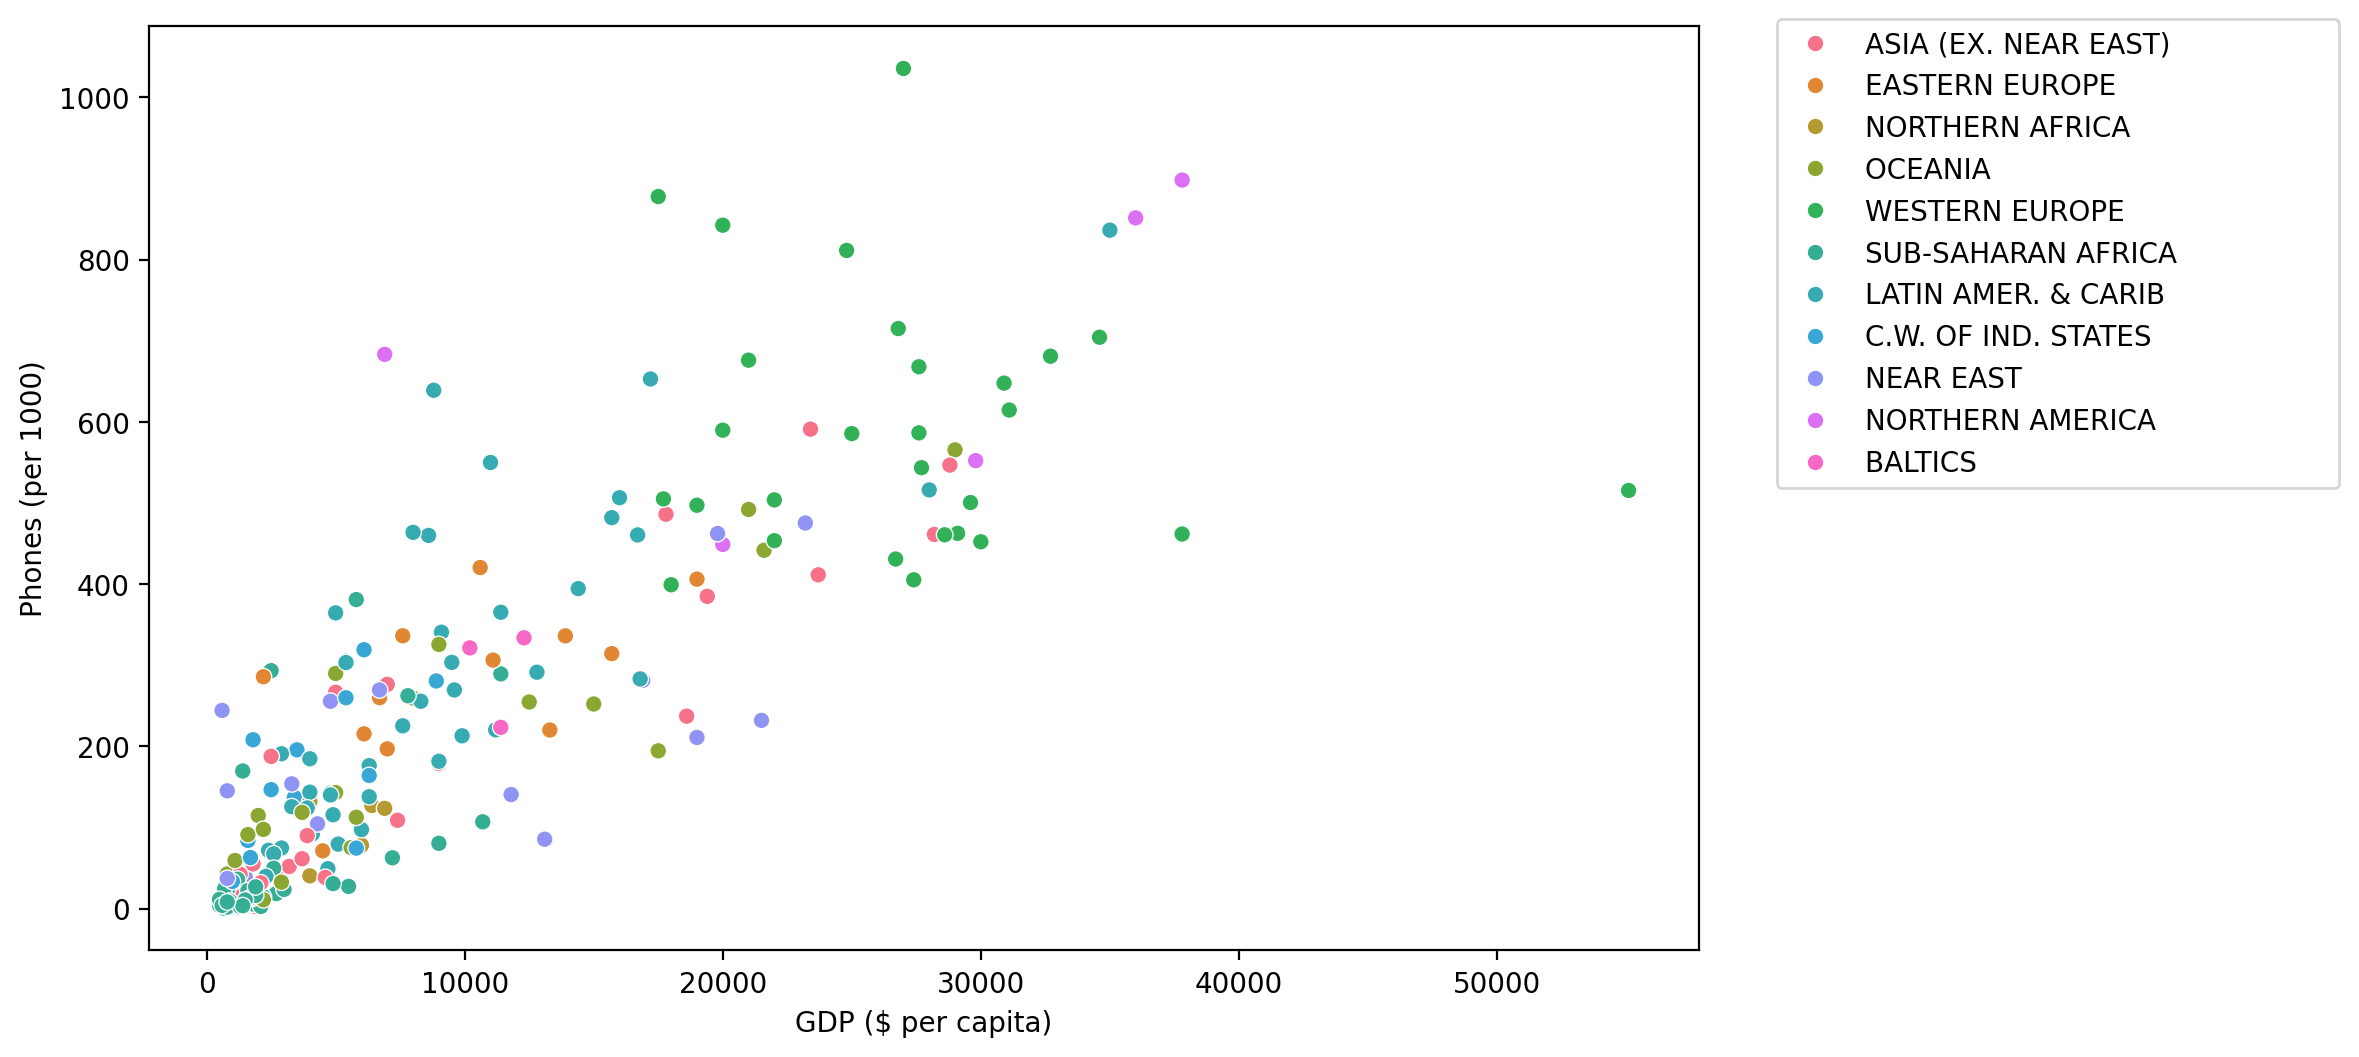

In [9]:
plt.figure(figsize=(10,6),dpi=200)
sns.scatterplot(data=df,x='GDP ($ per capita)',y='Phones (per 1000)',hue='Region')
plt.legend(loc=(1.05,0.5))

**Scatterplot showing the relationship between GDP per Capita and Literacy (color the points by Region)**

<AxesSubplot:xlabel='GDP ($ per capita)', ylabel='Literacy (%)'>

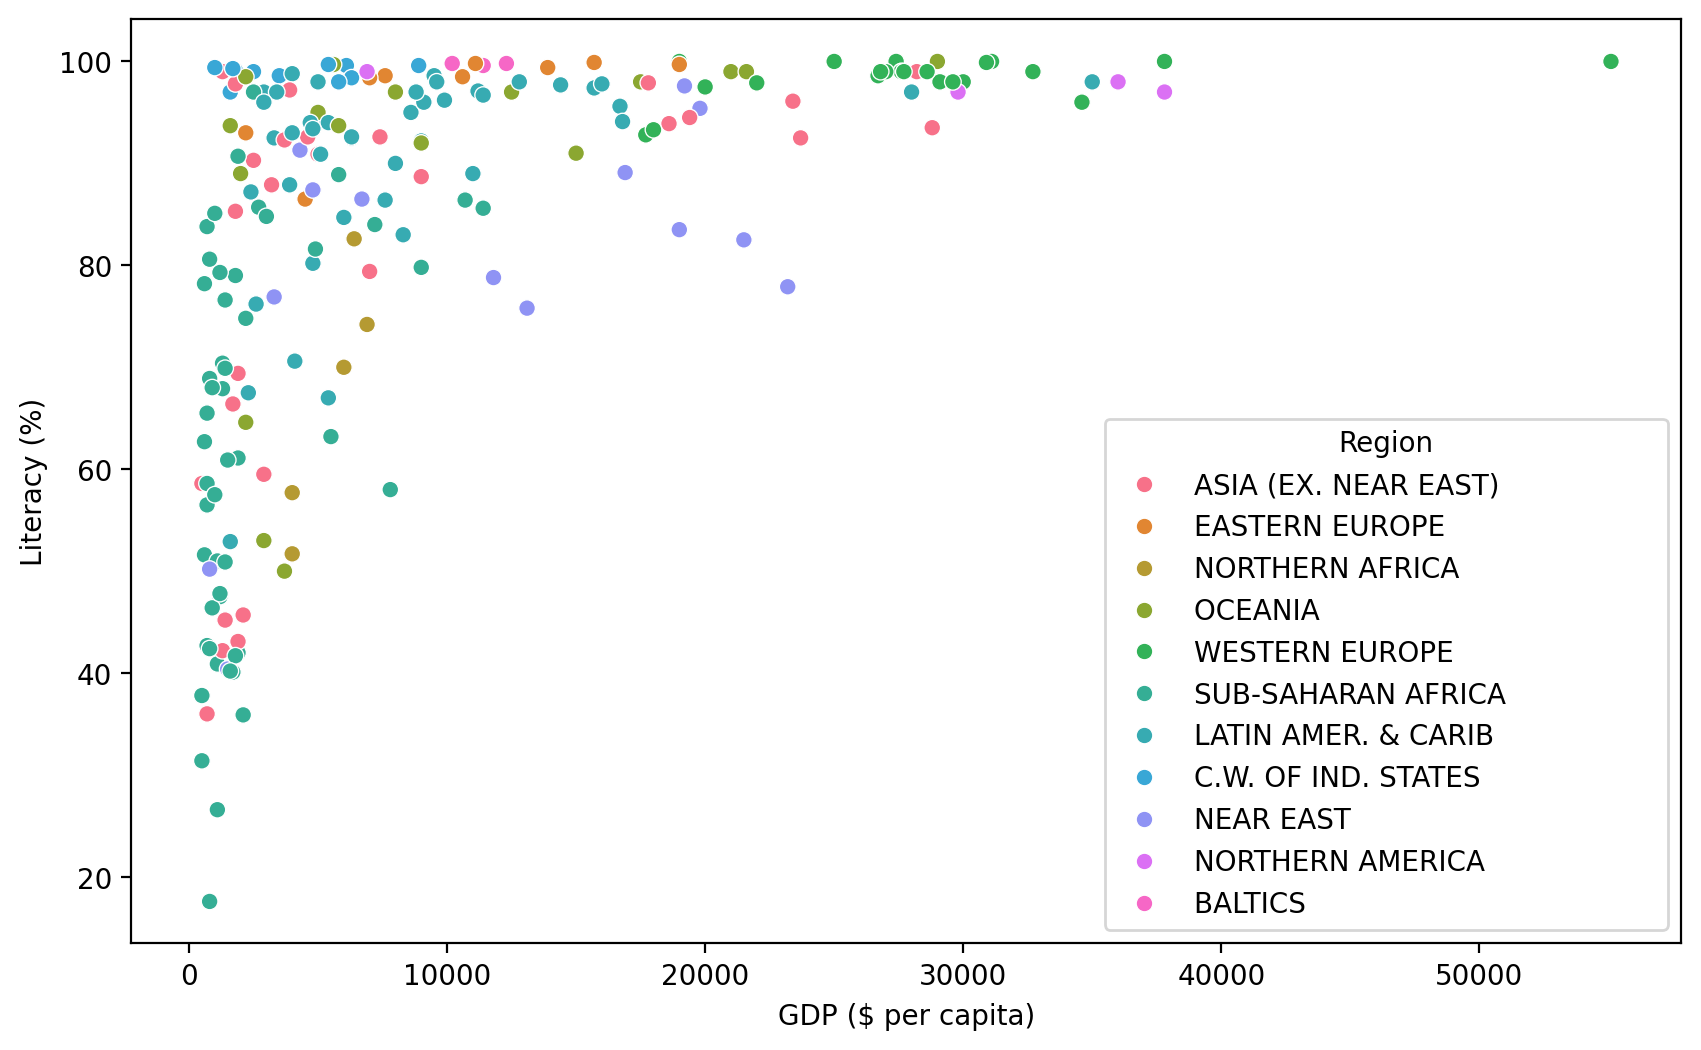

In [10]:
plt.figure(figsize=(10,6),dpi=200)
sns.scatterplot(data=df,x='GDP ($ per capita)',y='Literacy (%)',hue='Region')

**Heatmap of the Correlation between columns in the DataFrame.**

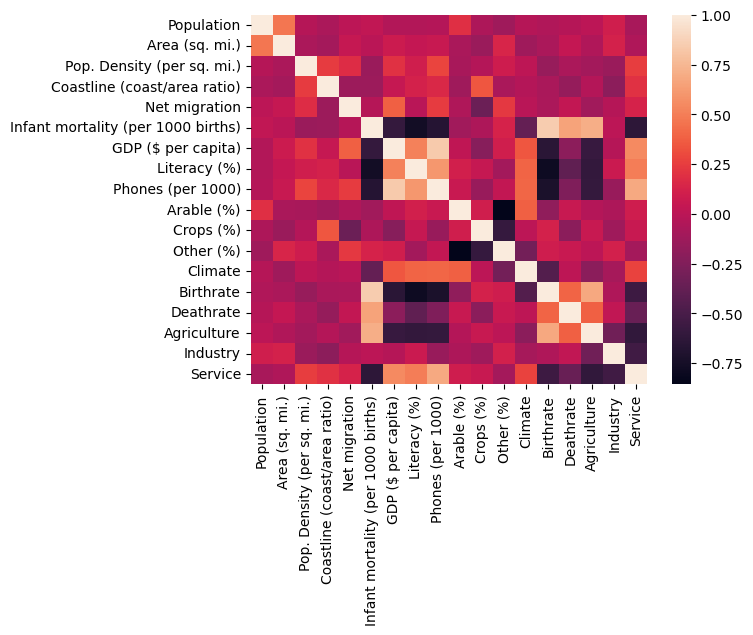

In [11]:
numeric_df = df.select_dtypes(include=['number'])  # Select only numeric columns
correlation_matrix = numeric_df.corr()

# Create a heatmap
sns.heatmap(correlation_matrix)

# Show the plot
plt.show()

**Clustermap of the correlations between each column**

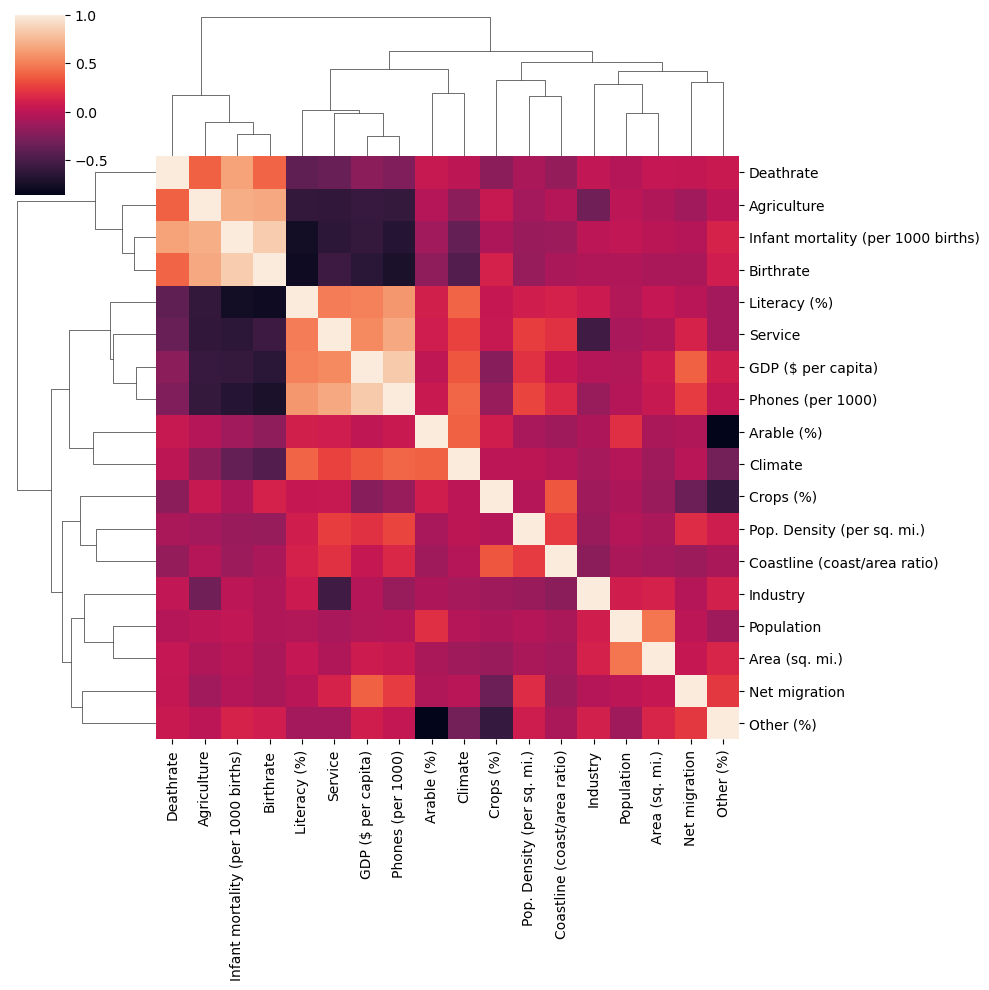

In [12]:
numeric_df = df.select_dtypes(include=['number'])  # Select only numeric columns
correlation_matrix = numeric_df.corr()

# Create a heatmap
sns.clustermap(correlation_matrix)

# Show the plot
plt.show()

-----

### Data Preparation and Model Discovery

#### Missing Data

In [13]:
df.isnull().sum()

Country                                0
Region                                 0
Population                             0
Area (sq. mi.)                         0
Pop. Density (per sq. mi.)             0
Coastline (coast/area ratio)           0
Net migration                          3
Infant mortality (per 1000 births)     3
GDP ($ per capita)                     1
Literacy (%)                          18
Phones (per 1000)                      4
Arable (%)                             2
Crops (%)                              2
Other (%)                              2
Climate                               22
Birthrate                              3
Deathrate                              4
Agriculture                           15
Industry                              16
Service                               15
dtype: int64

**Countries with NaN for Agriculture?**

In [14]:
df[df['Agriculture'].isnull()]['Country']

3            American Samoa
4                   Andorra
78                Gibraltar
80                Greenland
83                     Guam
134                 Mayotte
140              Montserrat
144                   Nauru
153      N. Mariana Islands
171            Saint Helena
174    St Pierre & Miquelon
177              San Marino
208       Turks & Caicos Is
221       Wallis and Futuna
223          Western Sahara
Name: Country, dtype: object

**I noticed most of these countries are tiny islands, with the exception of Greenland and Western Sahara. So I have decided to go ahead and fill any of these countries missing NaN values with 0, since they are so small or essentially non-existant.**

    df[df['feature'].isnull()]
    

In [15]:
# REMOVAL OF TINY ISLANDS
df[df['Agriculture'].isnull()] = df[df['Agriculture'].isnull()].fillna(0)

**I also noticed tht climate is missing for a few countries, but not the Region. So I decided to fill in the missing Climate values based on the mean climate value for its region.**

Reference: https://stackoverflow.com/questions/19966018/pandas-filling-missing-values-by-mean-in-each-group


In [16]:
df['Climate'] = df['Climate'].fillna(df.groupby('Region')['Climate'].transform('mean'))

**It stills has missing values like Literacy percentage. I used the same tactic as Climate missing values and filled in any missing Literacy % values with the mean Literacy % of the Region.**

In [17]:
df['Literacy (%)'] = df['Literacy (%)'].fillna(df.groupby('Region')['Literacy (%)'].transform('mean'))

In [18]:
df.isnull().sum()

Country                               0
Region                                0
Population                            0
Area (sq. mi.)                        0
Pop. Density (per sq. mi.)            0
Coastline (coast/area ratio)          0
Net migration                         1
Infant mortality (per 1000 births)    1
GDP ($ per capita)                    0
Literacy (%)                          0
Phones (per 1000)                     2
Arable (%)                            1
Crops (%)                             1
Other (%)                             1
Climate                               0
Birthrate                             1
Deathrate                             2
Agriculture                           0
Industry                              1
Service                               1
dtype: int64

**The data is still missing values for only a few countries. For simplicity, I decided to drop these.**

In [19]:
df = df.dropna()

### Data Feature Preparation

**Here I prepared the data for clustering. The Country column is still a unique identifier string, so it won't be useful for clustering, since its unique for each point. So I dropped this Country column.**

In [20]:
X = df.drop("Country",axis=1)

**Below I created the X array of features. The Region column is still categorical strings, so I had to use Pandas to create dummy variables from this column to create a finalzed X matrix of continuous features along with the dummy variables for the Regions.**

In [21]:
X = pd.get_dummies(X)

In [22]:
X.head()

Population  Area (sq. mi.)  Pop. Density (per sq. mi.)  \
0    31056997          647500                        48.0   
1     3581655           28748                       124.6   
2    32930091         2381740                        13.8   
3       57794             199                       290.4   
4       71201             468                       152.1   

   Coastline (coast/area ratio)  Net migration  \
0                          0.00          23.06   
1                          1.26          -4.93   
2                          0.04          -0.39   
3                         58.29         -20.71   
4                          0.00           6.60   

   Infant mortality (per 1000 births)  GDP ($ per capita)  Literacy (%)  \
0                              163.07               700.0          36.0   
1                               21.52              4500.0          86.5   
2                               31.00              6000.0          70.0   
3                                9.27              8000.0          97.0   
4                                4.05             19000.0         100.0   

   Phones (per 1000)  Arable (%)  ...  \
0                3.2       12.13  ...   
1               71.2       21.09  ...   
2               78.1        3.22  ...   
3              259.5       10.00  ...   
4              497.2        2.22  ...   

   Region_BALTICS                              Region_C.W. OF IND. STATES   \
0                                       False                        False   
1                                       False                        False   
2                                       False                        False   
3                                       False                        False   
4                                       False                        False   

   Region_EASTERN EUROPE                       Region_LATIN AMER. & CARIB      \
0                                       False                           False   
1                                        True                           False   
2                                       False                           False   
3                                       False                           False   
4                                       False                           False   

   Region_NEAR EAST                            \
0                                       False   
1                                       False   
2                                       False   
3                                       False   
4                                       False   

   Region_NORTHERN AFRICA                      \
0                                       False   
1                                       False   
2                                        True   
3                                       False   
4                                       False   

   Region_NORTHERN AMERICA                     \
0                                       False   
1                                       False   
2                                       False   
3                                       False   
4                                       False   

   Region_OCEANIA                              \
0                                       False   
1                                       False   
2                                       False   
3                                        True   
4                                       False   

   Region_SUB-SAHARAN AFRICA                   \
0                                       False   
1                                       False   
2                                       False   
3                                       False   
4                                       False   

   Region_WESTERN EUROPE                       
0                                       False  
1                                       False  
2                                       False  
3             

### Scaling

**Due to some measurements being in terms of percentages and other metrics being total counts (population), the data need to be scaled first**

In [23]:
from sklearn.preprocessing import StandardScaler

In [24]:
scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)

In [25]:
scaled_X

array([[ 0.0133285 ,  0.01855412, -0.20308668, ..., -0.31544015,
        -0.54772256, -0.36514837],
       [-0.21730118, -0.32370888, -0.14378531, ..., -0.31544015,
        -0.54772256, -0.36514837],
       [ 0.02905136,  0.97784988, -0.22956327, ..., -0.31544015,
        -0.54772256, -0.36514837],
       ...,
       [-0.06726127, -0.04756396, -0.20881553, ..., -0.31544015,
        -0.54772256, -0.36514837],
       [-0.15081724,  0.07669798, -0.22840201, ..., -0.31544015,
         1.82574186, -0.36514837],
       [-0.14464933, -0.12356132, -0.2160153 , ..., -0.31544015,
         1.82574186, -0.36514837]])

### Creating and Fitting Kmeans Model

**I used a for loop to create and fit multiple KMeans models, testing from K=2-30 clusters. I kept track of the Sum of Squared Distances for each K value, then plot this out to create an "elbow" plot of K versus SSD**

In [26]:
from sklearn.cluster import KMeans

In [27]:
ssd = []

for k in range(2,30):
    
    model = KMeans(n_clusters=k)
    
    
    model.fit(scaled_X)
    
    #Sum of squared distances of samples to their closest cluster center.
    ssd.append(model.inertia_)

Text(0, 0.5, ' Sum of Squared Distances')

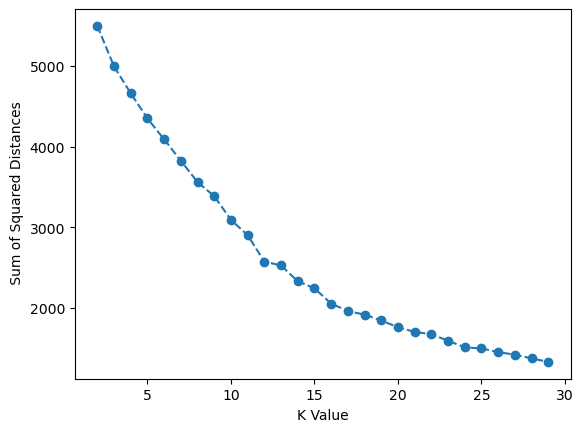

In [28]:
plt.plot(range(2,30),ssd,'o--')
plt.xlabel("K Value")
plt.ylabel(" Sum of Squared Distances")

<AxesSubplot:>

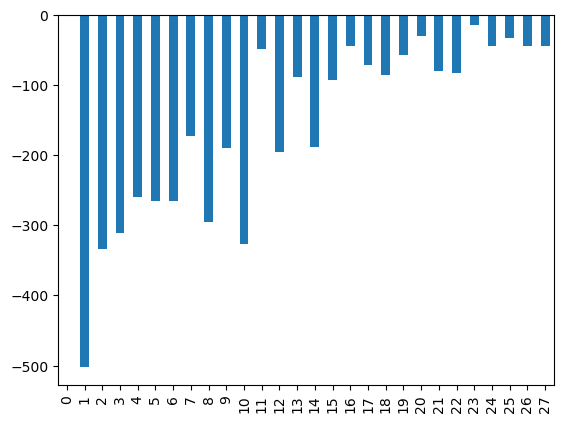

In [29]:
pd.Series(ssd).diff().plot(kind='bar')

-----

## Model Interpretation

**What K value do you think is a good choice?**

    -> K = 3 or K = 15

There is a significant drop off in SSD difference at K=3 and K = 15 (although we can see it continues to drop off past this). 

In [30]:
model = KMeans(n_clusters=3)
model.fit(scaled_X)

KMeans(n_clusters=3)

In [31]:
model.labels_

array([1, 2, 2, 2, 0, 1, 2, 2, 2, 2, 0, 0, 0, 2, 2, 2, 2, 0, 0, 0, 2, 1,
       0, 1, 2, 0, 1, 2, 0, 2, 0, 1, 2, 1, 2, 1, 0, 2, 0, 1, 1, 2, 2, 2,
       1, 1, 1, 2, 1, 0, 2, 0, 0, 1, 2, 2, 2, 2, 2, 1, 1, 0, 1, 0, 2, 0,
       0, 2, 2, 1, 1, 2, 2, 0, 1, 0, 0, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 0,
       0, 0, 2, 2, 2, 2, 0, 0, 0, 0, 2, 0, 0, 2, 2, 1, 2, 2, 0, 2, 2, 1,
       0, 2, 1, 1, 2, 0, 0, 0, 0, 0, 1, 1, 2, 2, 1, 0, 2, 2, 1, 2, 1, 2,
       2, 2, 2, 2, 2, 1, 1, 2, 1, 0, 2, 2, 0, 2, 1, 1, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 0, 0, 2, 2, 2, 0, 0, 1, 2, 2, 2, 2, 2, 2, 0, 2, 2, 1,
       2, 1, 0, 0, 0, 2, 1, 1, 0, 2, 1, 2, 1, 0, 0, 2, 0, 2, 1, 2, 1, 2,
       2, 2, 2, 2, 2, 2, 1, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1,
       1], dtype=int32)

In [32]:
X['K=3 Clusters'] = model.labels_

In [33]:
X.corr()['K=3 Clusters'].sort_values()

GDP ($ per capita)                           -0.586605
Region_WESTERN EUROPE                        -0.547311
Phones (per 1000)                            -0.495793
Climate                                      -0.415340
Net migration                                -0.358032
Deathrate                                    -0.355738
Region_EASTERN EUROPE                        -0.293640
Service                                      -0.249009
Arable (%)                                   -0.208622
Region_BALTICS                               -0.175832
Pop. Density (per sq. mi.)                   -0.171812
Literacy (%)                                 -0.131273
Region_SUB-SAHARAN AFRICA                    -0.094161
Region_NORTHERN AMERICA                      -0.083535
Area (sq. mi.)                               -0.077134
Other (%)                                     0.033105
Region_ASIA (EX. NEAR EAST)                   0.064209
Population                                    0.068264
Industry  

------------
-------------

## Geographical Model Interpretation

**Created Cluster Labels for a chosen K value. Based on above k value analysis, either K=3 or K=15 are reasonable choices.**

In [34]:
model = KMeans(n_clusters=15)
    
model.fit(scaled_X)

KMeans(n_clusters=15)

In [35]:
model = KMeans(n_clusters=3)
    
model.fit(scaled_X)

KMeans(n_clusters=3)

**Plot out these clusters on a country level choropleth map**

1. Install plotly library: https://plotly.com/python/getting-started/

2. Reference: https://plotly.com/python/choropleth-maps/#using-builtin-country-and-state-geometries

3. Download ISO Codes for this:**"../DATA/country_iso_codes.csv"**

4. Combine the cluster labels, ISO Codes, and Country Names to create a world map plot with plotly

In [36]:
iso_codes = pd.read_csv("../DATA/country_iso_codes.csv")

In [37]:
iso_codes

Country  \
0                                        Afghanistan   
1    Akrotiri and Dhekelia – See United Kingdom, The   
2                                      Åland Islands   
3                                            Albania   
4                                            Algeria   
..                                               ...   
296                                 Congo, Dem. Rep.   
297                             Congo, Repub. of the   
298                                         Tanzania   
299                             Central African Rep.   
300                                    Cote d'Ivoire   

                                            ISO Code  
0                                                AFG  
1    Akrotiri and Dhekelia – See United Kingdom, The  
2                                                ALA  
3                                                ALB  
4                                                DZA  
..                                               ...  
296                                              COD  
297                                              COG  
298                                              TZA  
299                                              CAF  
300                                              CIV  

[301 rows x 2 columns]

```iso_mapping = iso_codes.set_index('Country')['ISO Code'].to_dict()```

is creating a dictionary (iso_mapping) from a DataFrame (iso_codes).

```df['ISO Code'] = df['Country'].map(iso_mapping) ```

is adding a new column named 'ISO Code' to the DataFrame df. 

In [38]:
iso_mapping = iso_codes.set_index('Country')['ISO Code'].to_dict()

In [39]:
iso_mapping

{'Afghanistan': 'AFG',
 'Akrotiri and Dhekelia – See United Kingdom, The': 'Akrotiri and Dhekelia – See United Kingdom, The',
 'Åland Islands': 'ALA',
 'Albania': 'ALB',
 'Algeria': 'DZA',
 'American Samoa': 'ASM',
 'Andorra': 'AND',
 'Angola': 'AGO',
 'Anguilla': 'AIA',
 'Antarctica\u200a[a]': 'ATA',
 'Antigua and Barbuda': 'ATG',
 'Argentina': 'ARG',
 'Armenia': 'ARM',
 'Aruba': 'ABW',
 'Ashmore and Cartier Islands – See Australia.': 'Ashmore and Cartier Islands – See Australia.',
 'Australia\u200a[b]': 'AUS',
 'Austria': 'AUT',
 'Azerbaijan': 'AZE',
 'Bahamas (the)': 'BHS',
 'Bahrain': 'BHR',
 'Bangladesh': 'BGD',
 'Barbados': 'BRB',
 'Belarus': 'BLR',
 'Belgium': 'BEL',
 'Belize': 'BLZ',
 'Benin': 'BEN',
 'Bermuda': 'BMU',
 'Bhutan': 'BTN',
 'Bolivia (Plurinational State of)': 'BOL',
 'Bonaire\xa0Sint Eustatius\xa0Saba': 'BES',
 'Bosnia and Herzegovina': 'BIH',
 'Botswana': 'BWA',
 'Bouvet Island': 'BVT',
 'Brazil': 'BRA',
 'British Indian Ocean Territory (the)': 'IOT',
 'British V

In [40]:
# Same as df['ISO Code'] = df['Country'].map(iso_mapping)

df.loc[:, 'ISO Code'] = df['Country'].map(iso_mapping)

In [41]:
# Same as df['Cluster'] = model.labels_

df.loc[:, 'Cluster'] = model.labels_

In [42]:
df

Country                               Region  Population  \
0       Afghanistan        ASIA (EX. NEAR EAST)             31056997   
1           Albania  EASTERN EUROPE                          3581655   
2           Algeria  NORTHERN AFRICA                        32930091   
3    American Samoa  OCEANIA                                   57794   
4           Andorra  WESTERN EUROPE                            71201   
..              ...                                  ...         ...   
222       West Bank  NEAR EAST                               2460492   
223  Western Sahara  NORTHERN AFRICA                          273008   
224           Yemen  NEAR EAST                              21456188   
225          Zambia  SUB-SAHARAN AFRICA                     11502010   
226        Zimbabwe  SUB-SAHARAN AFRICA                     12236805   

     Area (sq. mi.)  Pop. Density (per sq. mi.)  Coastline (coast/area ratio)  \
0            647500                        48.0                          0.00   
1             28748                       124.6                          1.26   
2           2381740                        13.8                          0.04   
3               199                       290.4                         58.29   
4               468                       152.1                          0.00   
..              ...                         ...                           ...   
222            5860                       419.9                          0.00   
223          266000                         1.0                          0.42   
224          527970                        40.6                          0.36   
225          752614                        15.3                          0.00   
226          390580                        31.3                          0.00   

     Net migration  Infant mortality (per 1000 births)  GDP ($ per capita)  \
0            23.06                              163.07               700.0   
1            -4.93                               21.52              4500.0   
2            -0.39                               31.00              6000.0   
3           -20.71                                9.27              8000.0   
4             6.60                                4.05             19000.0   
..             ...                                 ...                 ...   
222           2.98                               19.62               800.0   
223           0.00                                0.00                 0.0   
224           0.00                               61.50               800.0   
225           0.00                               88.29               800.0   
226           0.00                               67.69              1900.0   

     Literacy (%)  ...  Crops (%)  Other (%)  Climate  Birthrate  Deathrate  \
0       36.000000  ...       0.22      87.65      1.0      46.60      20.34   
1       86.500000  ...       4.42      74.49      3.0      15.11       5.22   
2       70.000000  ...       0.25      96.53      1.0      17.14       4.61   
3       97.000000  ...      15.00      75.00      2.0      22.46       3.27   
4      100.000000  ...       0.00      97.78      3.0       8.71       6.25   
..            ...  ...        ...        ...      ...        ...        ...   
222     79.521429  ...      18.97      64.13      3.0      31.67       3.92   
223      0.000000  ...       0.00      99.98      1.0       0.00       0.00   
224     50.200000  ...       0.24      96.98      1.0      42.89       8.30   
225     80.600000  ...       0.03      92.90      2.0      41.00      19.93   
226     90.700000  ...       0.34      91.34      2.0      28.01      21.84   

     Agriculture  Industry  Service  ISO Code  Cluster  
0          0.380     0.240    0.380       AFG        2  
1          0.232     0.188    0.579       ALB        0  
2          0.101     0.600    0.298       DZA        1  
3          0.000     0.000    0.000       ASM        1  
4  

In [43]:
import plotly.express as px

fig = px.choropleth(df, locations="ISO Code",
                    color="Cluster", # lifeExp is a column of gapminder
                    hover_name="Country", # column to add to hover information
                    color_continuous_scale='Turbo'
                    )
fig.show()

---